In [163]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [164]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving Loans_Dataset.csv to Loans_Dataset (7).csv


In [165]:
df = pd.read_csv('Loans_Dataset.csv')

In [166]:
df.head(20)

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


In [167]:
df.drop(columns= ['house_number'], inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   sum              1004 non-null   int64 
 4   result           1004 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.3+ KB


In [169]:
df.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


<Axes: xlabel='credit_score', ylabel='Density'>

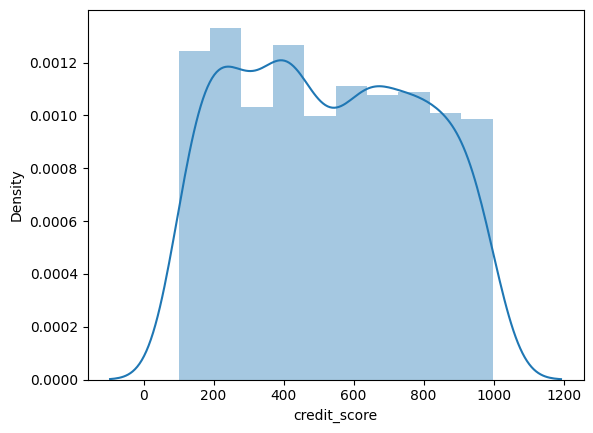

In [170]:
#Credit score distribution
sns.distplot(df['credit_score'])

In [171]:
# Label Encoding
le = LabelEncoder()
df['result']= le.fit_transform(df['result'])

In [172]:
# Correlation matrix
df.corr()

,initial_payment,last_payment,credit_score,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.068387,-0.076326
sum,0.050698,0.213237,0.068387,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.092830,1.000000


<Axes: >

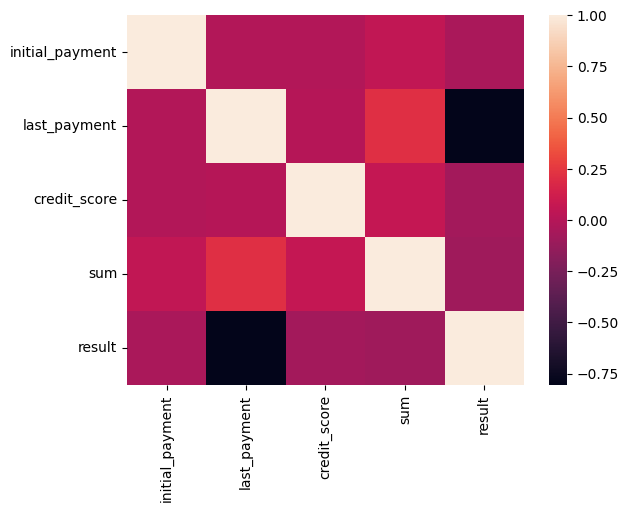

In [173]:
sns.heatmap(df.corr())

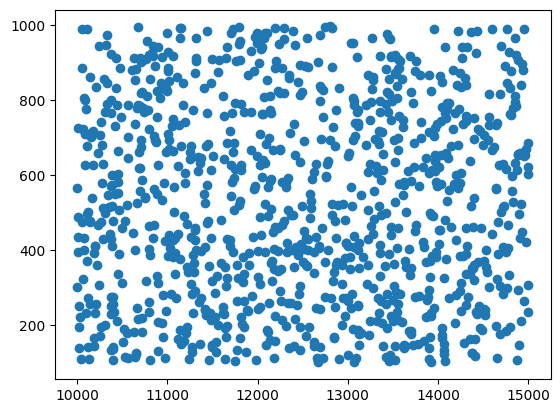

In [174]:
#Relationship between Credit Score and Result
plt.scatter(df['last_payment'], df['credit_score'])

In [175]:
# Split the data into independent/dependent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [176]:
# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = True)

In [177]:
#Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
#Train model with Decision Tree Classification
dtc = DecisionTreeClassifier(ccp_alpha=0.01,
                             max_depth = 3,
                             criterion = 'entropy',
                             random_state= 42,
                             min_samples_leaf=5,
                             min_samples_split=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=3,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [179]:
# Predict result
y_pred = dtc.predict(X_test)

In [180]:
#Evaluate Model Accuracy
accuracy_score(y_test, y_pred)

1.0

In [181]:
#Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        95

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [182]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


<Axes: >

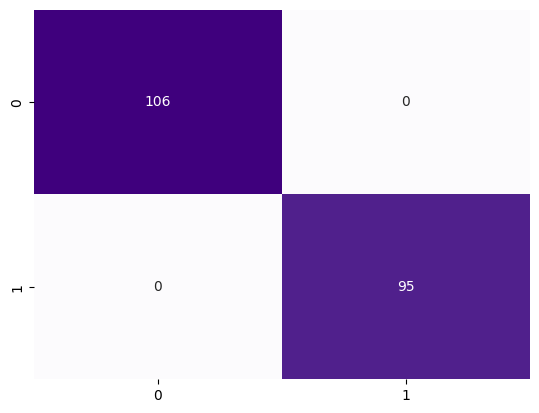

In [183]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)

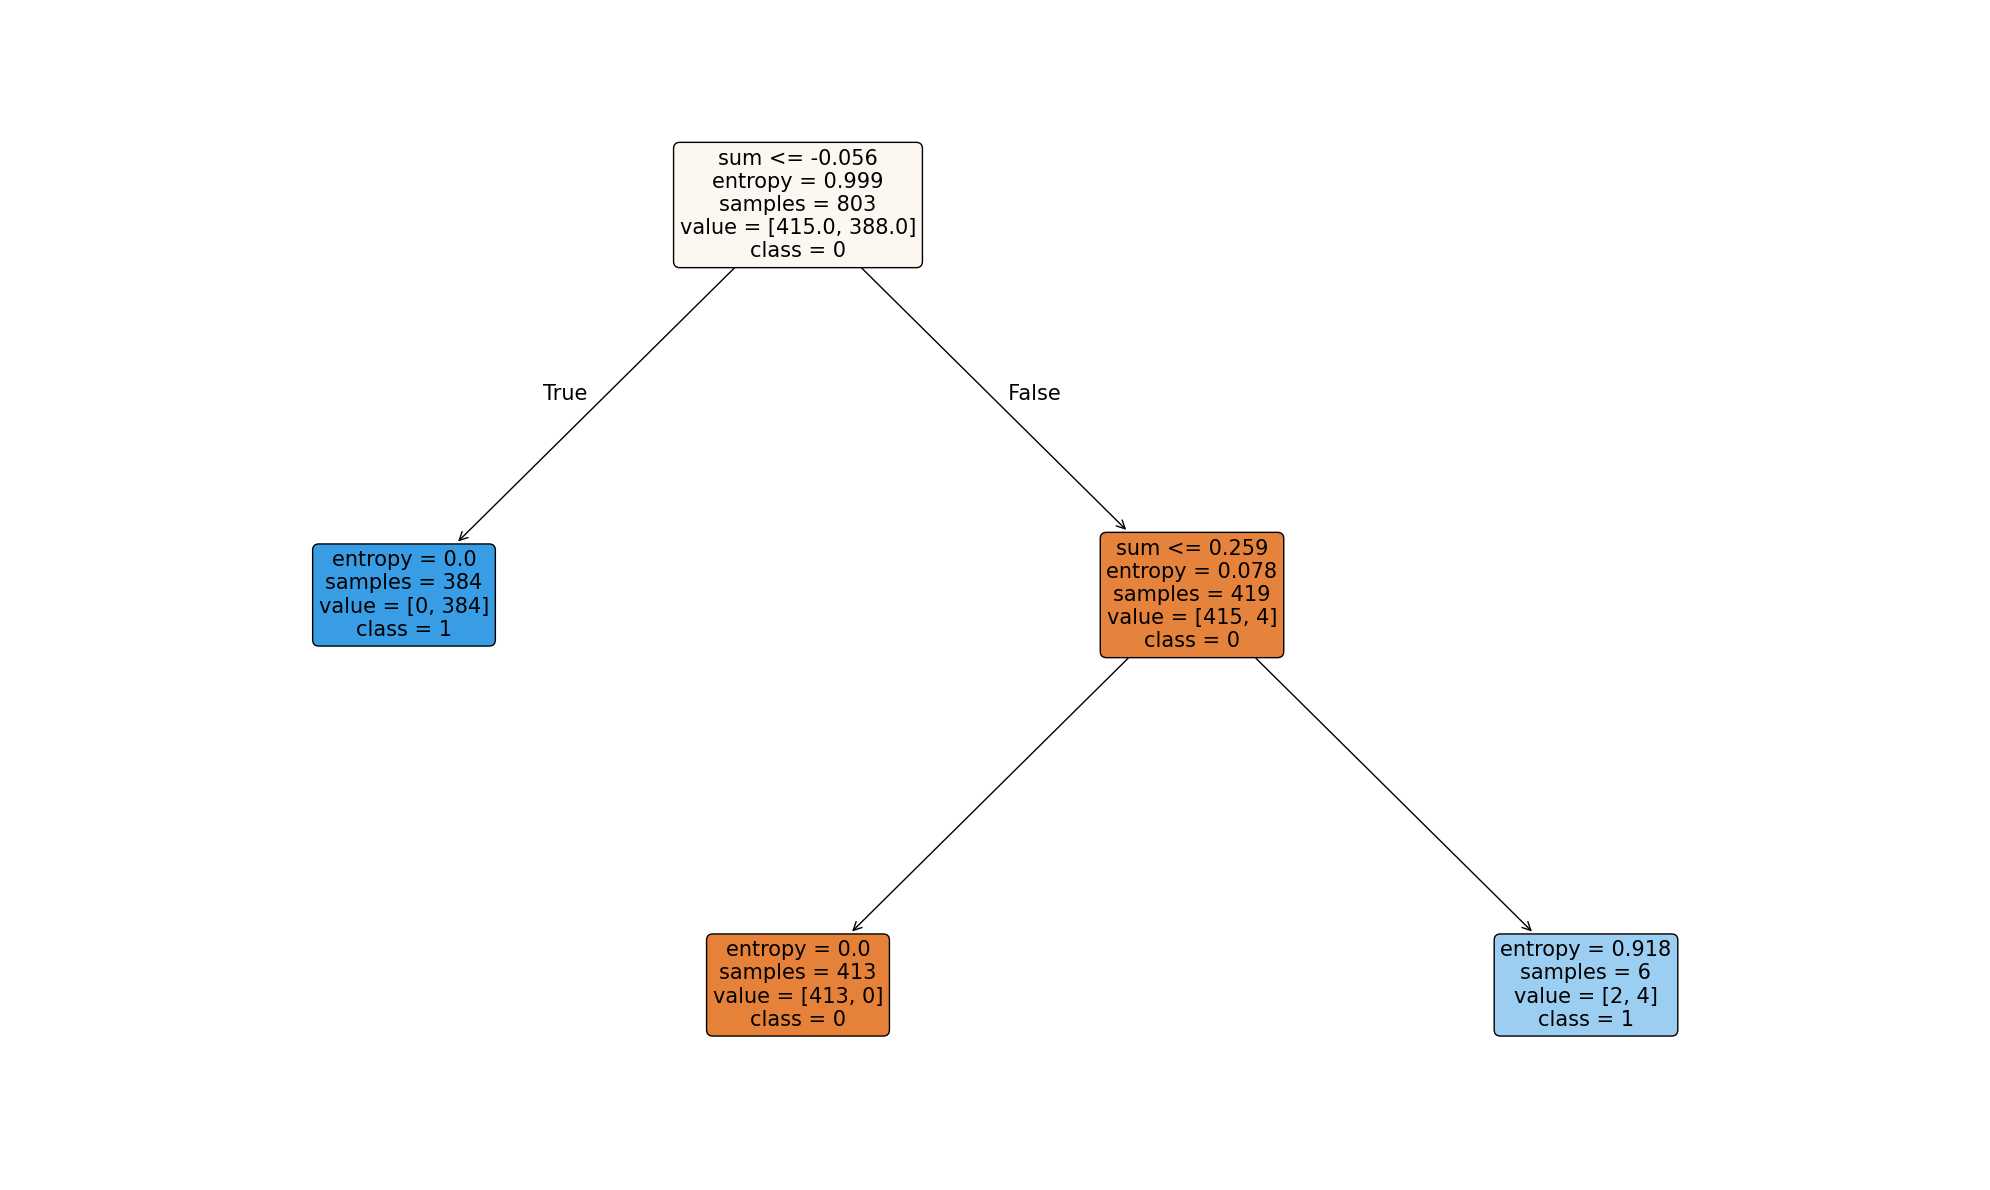

In [184]:
# Plot the Decision tree
plt.figure(figsize=(20, 12))  # Wider and taller to space out nodes
plot_tree(
    dtc,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in dtc.classes_],
    fontsize=15  # You can reduce fontsize if text overlaps
)
plt.tight_layout()
plt.show()